In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import pandas as pd
import numpy as np
# Classifier Libraries
from sklearn.neighbors import KNeighborsClassifier
import collections
#Resampling-Methode
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score as fs
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Datensätzen einlesen

In [26]:
df =pd.read_csv(r'C:\Tensorflow Object Detection\TFODCourse\covid 19\dev_dec_jan.csv')

In [27]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


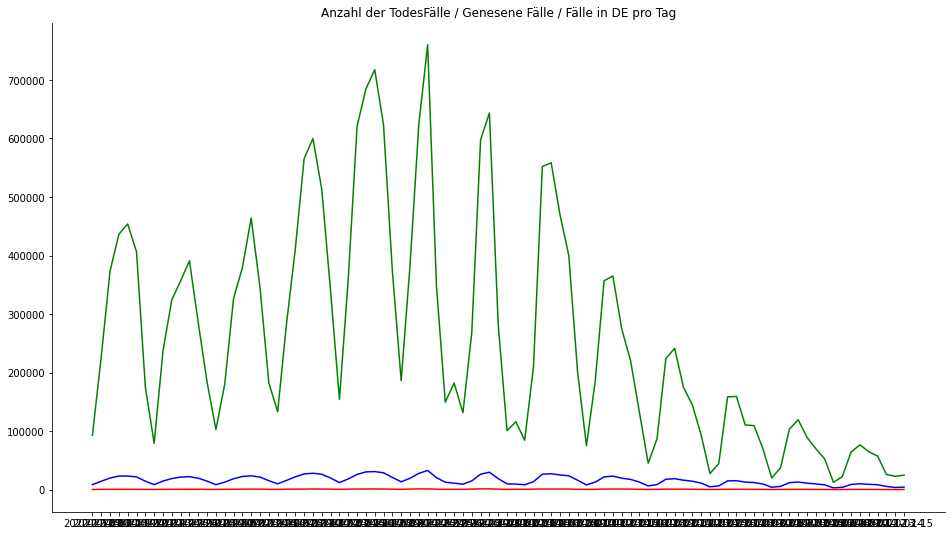

In [103]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_cases["date"],
        df_cases["cases"],
        color="g");
ax.plot(df_cases["date"],
        df_cases["recovered"],
        color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der TodesFälle / Genesene Fälle / Fälle in DE pro Tag");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

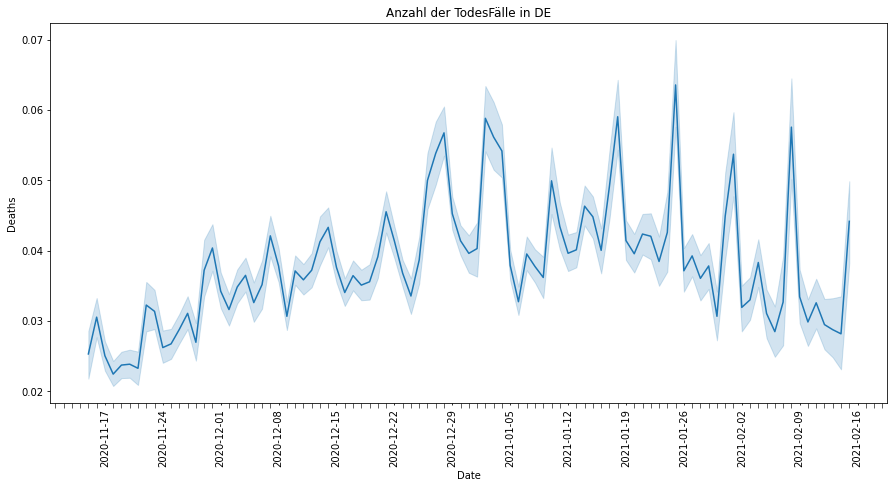

In [104]:
import matplotlib.dates as md
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='date', y='deaths', data=df).set_title('Anzahl der TodesFälle in DE')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 2)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Deaths')

# show the plot
plt.show()

# Anzahl der Todesfälle in DE zwischen 15-11-2020 und 15-2-2021

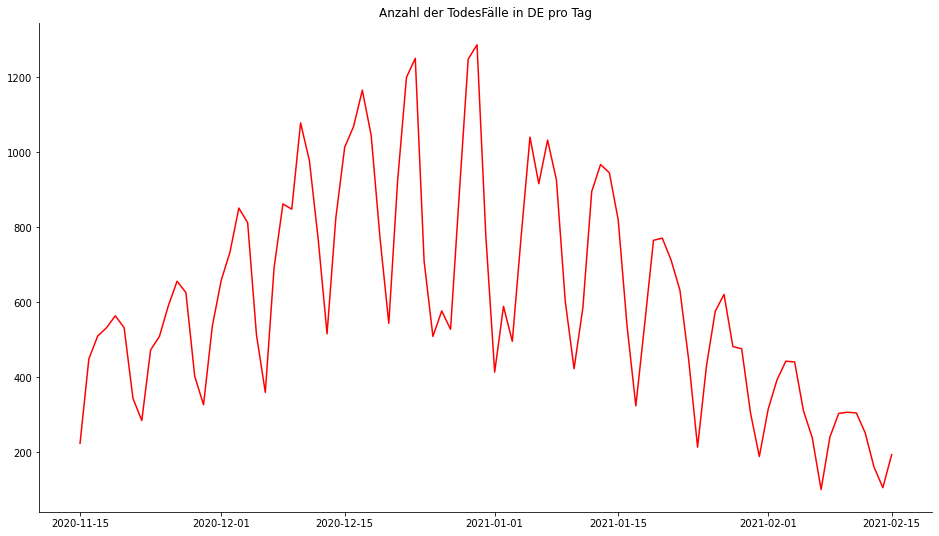

In [105]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(df_cases["date"],
#         df_cases["cases"],
#         color="g");
# ax.plot(df_cases["date"],
#         df_cases["recovered"],
#         color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der Todesfälle in DE");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [106]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


<AxesSubplot:title={'center':'deaths'}>

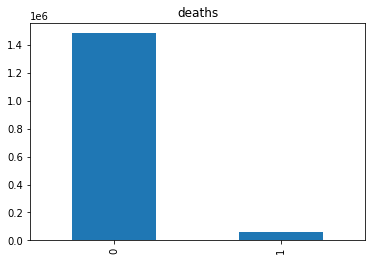

In [107]:
df["deaths"].value_counts().plot.bar(title='deaths')

<AxesSubplot:title={'center':'gender'}>

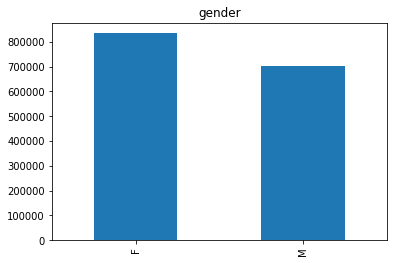

In [108]:
REASON_count= df["gender"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["gender"].value_counts().plot.bar(title='gender')

<AxesSubplot:title={'center':'age_group'}>

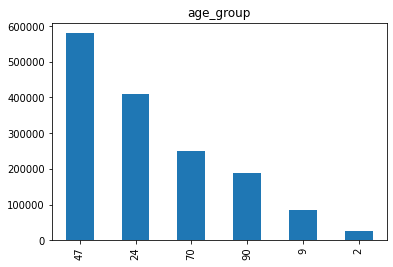

In [109]:
REASON_count= df["age_group"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["age_group"].value_counts().plot.bar(title='age_group')

# Todesfälle nach Altergruppen in DE zwischen 15-11-2020 und 15-2-2021

<AxesSubplot:title={'center':'TodesFälle nach Altergruppen in DE'}, xlabel='age_group', ylabel='Todesfälle'>

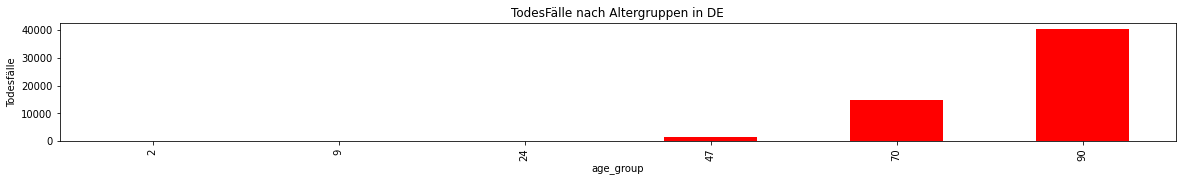

In [110]:
import matplotlib.pyplot as plt
age_group =df.groupby(['age_group']).sum()
deaths_age_group=age_group['deaths']
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(4,1,1)
ax.set_ylabel('Todesfälle')
ax.set_title('Todesfälle nach Altergruppen in DE')
deaths_age_group.plot(kind='bar',color='red')

In [111]:
cov_age = df.groupby(['age_group']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths"]/cov_age["cases"]* 100,1)
cov_age

,age_group,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum,death_percentage
0,2,55223,4,26695,28301168,13932896,13710,42956257996800,0.0
1,9,380245,3,83262,92200249,44698429,43550,133930913788800,0.0
2,24,6566504,55,411117,484534493,227525066,198309,661483489737600,0.0
3,47,12300314,1644,578880,600376847,296222362,265827,933964271596800,0.0
4,70,2396216,14840,235545,242916937,123333769,122442,402860588947200,0.6
5,90,2090260,40577,147003,179640177,90934983,60363,301824364060800,1.9


<AxesSubplot:title={'center':'age_group vs deaths / recovered'}, xlabel='age_group'>

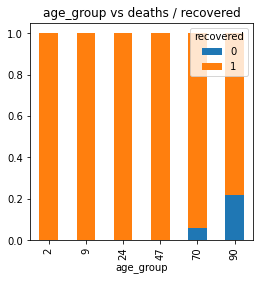

In [112]:
gender=pd.crosstab(df['age_group'],df['recovered'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='age_group vs deaths / recovered', figsize=(4,4))

In [113]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [114]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


In [92]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


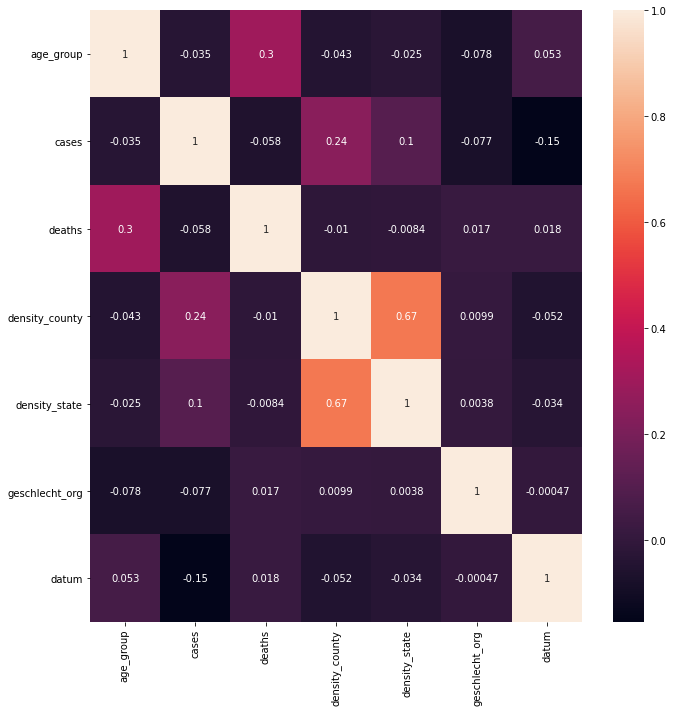

<Figure size 432x288 with 0 Axes>

In [93]:
corr = df.drop(['state','county','date','gender','recovered'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()

# Korrelationsmatrix zwischen den Variablen des Covid-19-Datensatzes:
    Die hervorgehobene Zelle unten zeigt beispielsweise, dass die Korrelation zwischen den Spalten „deaths“ und „age_group“ 
    0,3 beträgt, was darauf hinweist, dass sie positiv korreliert sind. Je älter die Covid-19 erkrankten Personen sind
    , desto mehr sterben sie an Covid-19.

In [116]:
df.isnull().sum()

state             0
county            0
age_group         0
gender            0
date              0
cases             0
deaths            0
recovered         0
density_county    0
density_state     0
geschlecht_org    0
datum             0
dtype: int64

In [5]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


In [28]:
df["deaths"].sum()

57123

In [94]:
df["recovered"].sum()

1482502

# Ausführung des KNN-Algorithmus auf dem Covid-19-Datensatz 

In [34]:
y = df.deaths
X = df.drop(['deaths'],axis=1)

In [35]:
y.sum()

57123

In [36]:
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
X_train_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
1122545,Nordrhein-Westfalen,SK Koeln,90,F,2021-01-20,14,1,2686,526,0,1611100800
1365100,Sachsen,LK Zwickau,90,M,2021-01-12,21,1,332,221,1,1610409600
917322,Nordrhein-Westfalen,LK Maerkischer Kreis,47,F,2021-02-03,17,1,387,526,0,1612310400
1318388,Sachsen,LK Mittelsachsen,70,F,2020-12-28,9,0,144,221,0,1609113600


In [38]:
X_test_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
899007,Nordrhein-Westfalen,LK Hochsauerlandkreis,90,M,2021-01-20,4,1,133,526,1,1611100800
1057250,Nordrhein-Westfalen,SK Dortmund,47,M,2021-01-20,20,1,2096,526,1,1611100800
490454,Berlin,SK Berlin Neukoelln,90,F,2020-12-17,35,1,14201,4090,0,1608163200
1307121,Sachsen,LK Meissen,70,M,2020-12-07,24,1,166,221,1,1607299200


In [39]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [40]:
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [41]:
X_test.head(4)

,age_group,density_county,density_state,geschlecht_org,datum
899007,90,133,526,1,1611100800
1057250,47,2096,526,1,1611100800
490454,90,14201,4090,0,1608163200
1307121,70,166,221,1,1607299200


# Die Folgenden Faktoren werden untersucht:
    1) Die Ausfürungsdauer (Lernen und Vorhersagen)
    2) Der Speicherbedard (Lernen und Vorhersagen)
    3) Auswahl der Paramenter des untersuchen Algotrithmus 
    

In [18]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn= KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)



 memory before (Byte):  859418624 
 memory after (Byte): 859422720 
 used_memory (Byte): 4096 
 time (Sekunde): 44.03518080711365


In [19]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()

pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train))

finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  859422720 
 memory after (Byte): 859422720 
 used_memory (Byte): 0 
 time (Sekunde): 113.8943657875061


# Bewertung der Ergebnisse

Accuracy of test_data:  0.9535524165577659
Accuracy of train_data:  0.9642267635907642
*** Evaluation metrics for test dataset ***

Recall Score:  0.1110041265474553
Precision Score:  0.24581175753883644
F1 Score:  0.15294229129157585
Accuracy:  0.9535524165577659


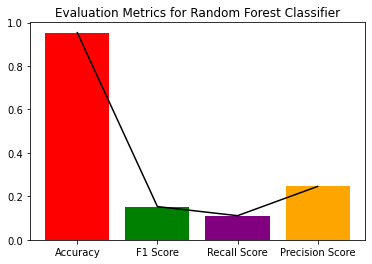


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     0
1307121       0     0
251263        0     0
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 55.00000000000001)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    370367
           1       0.25      0.11      0.15     14540

    accuracy                           0.95    384907
   macro avg       0.61      0.55      0.56    384907
weighted avg       0.94      0.95      0.95    384907

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
('Model roc score:', 55.00000000000001)
******************************** confusion matrix *****************************




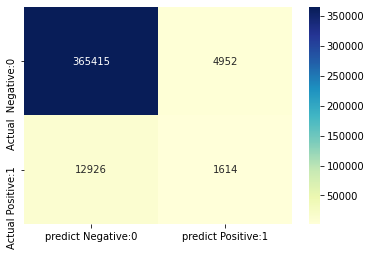

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 365415 (TNR = 98.66%),FP = 4952 (FPR = 1.34%)
True 1(deaths),FN = 12926 (FNR = 88.90%),TP = 1614 (TPR = 11.10%)


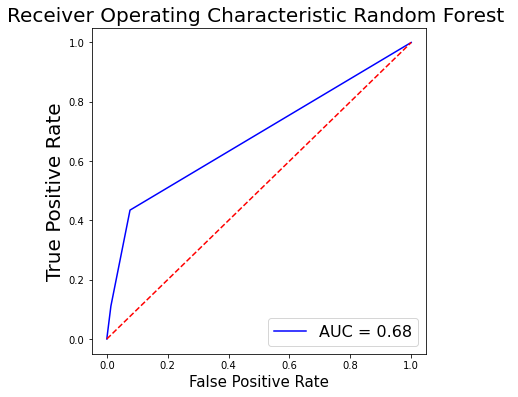

In [20]:

print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(knn.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)

print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))

print('******************************** confusion matrix *****************************\n\n')
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

# Die Ergebnisse:
    1) KNeighborsClassifier hat die Minderheitsklasse(Anzahl der gestorbenen Personen) nicht gut vorhergesagt (Siehe Confusion Matrix)
    2) Der mögliche Grund dafür:
        Der untersuchten Trainingsdatensatz ist Imbalnced:
        Anzahl der genesenen Fälle ist: 1.482.502                                                      
        Anzahl der Todesfälle ist: 57.123   

# Die Lösungen:
    1) Nutzung der Resampling-Methode 
       from imblearn.under_sampling import RandomUnderSampler, NearMiss
       from imblearn.over_sampling import RandomOverSampler, SMOTE
    2) Nutzung von Kfold-Methode (Nutzung von RandomizedSearch)
       from sklearn.model_selection import KFold, StratifiedKFold
    3) Änderung der Parameter des Algorithmus (Nutzung der Funktion GridSearchCV, 
                                               um der Parameter des bestes Modul zu identifizieren)
       from sklearn.model_selection import GridSearchCV
    4) Verwendung andere Algorithmus
    

# Nutzung von RandomizedSearch, um die beste K-Parameter zu identifizieren (K: Anzahl der Nachbaren. (default K = 5)

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
k=np.random.randint(1,50,60)
params= {'n_neighbors': k}
random_search= RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(X_train, y_train)
print("train score- "+ str(random_search.score(X_train,y_train)))
print("train score- "+ str(random_search.score(X_test,y_test)))

train score- 0.9631243299229769
train score- 0.9622246412769838


In [63]:
print(random_search.best_params_)

{'n_neighbors': 48}


In [64]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn= KNeighborsClassifier(n_neighbors=48).fit(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)



 memory before (Byte):  1394126848 
 memory after (Byte): 1461530624 
 used_memory (Byte): 67403776 
 time (Sekunde): 43.067253828048706


In [65]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()

pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train))

finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1461534720 
 memory after (Byte): 1470775296 
 used_memory (Byte): 9240576 
 time (Sekunde): 191.0539083480835


Accuracy of test_data:  0.9622246412769838
Accuracy of train_data:  0.9631243299229769
*** Evaluation metrics for test dataset ***

Recall Score:  0.000343878954607978
Precision Score:  0.5
F1 Score:  0.0006872852233676976
Accuracy:  0.9622246412769838


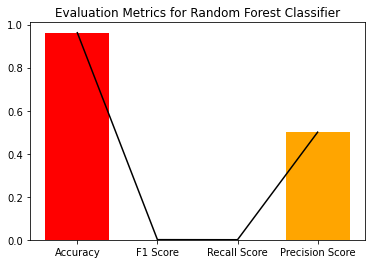


	Table 3

         deaths  pred
899007        0     0
1057250       0     0
490454        0     0
1307121       0     0
251263        0     0
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 50.0)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    370367
           1       0.50      0.00      0.00     14540

    accuracy                           0.96    384907
   macro avg       0.73      0.50      0.49    384907
weighted avg       0.94      0.96      0.94    384907

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
('Model roc score:', 50.0)
******************************** confusion matrix *****************************




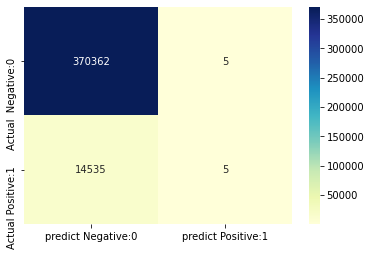

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 370362 (TNR = 100.00%),FP = 5 (FPR = 0.00%)
True 1(deaths),FN = 14535 (FNR = 99.97%),TP = 5 (TPR = 0.03%)


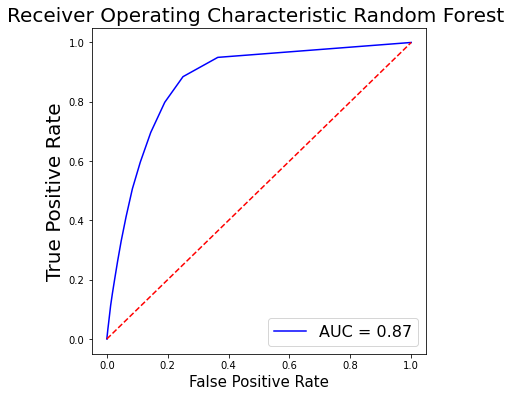

In [66]:

print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(knn.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)

print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))

print('******************************** confusion matrix *****************************\n\n')
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

# RandomUnderSampler

In [69]:
rus =RandomUnderSampler()
knn= KNeighborsClassifier(n_neighbors=48)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [70]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1477992448 
 memory after (Byte): 1470054400 
 used_memory (Byte): -7938048 
 time (Sekunde): 0.4338414669036865


In [71]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1470058496 
 memory after (Byte): 1477136384 
 used_memory (Byte): 7077888 
 time (Sekunde): 0.32117509841918945


Accuracy of test_data:  0.689007994138844
Accuracy of train_data:  0.7187844914637297
Recall: 0.698
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 69.0)
              precision    recall  f1-score   support

           0       0.98      0.69      0.81    370367
           1       0.08      0.70      0.14     14540

    accuracy                           0.69    384907
   macro avg       0.53      0.69      0.48    384907
weighted avg       0.95      0.69      0.78    384907

Recall Score:  0.6980055020632737
Precision Score:  0.08089366416655375
F1 Score:  0.14498467868086656
Accuracy:  0.689007994138844


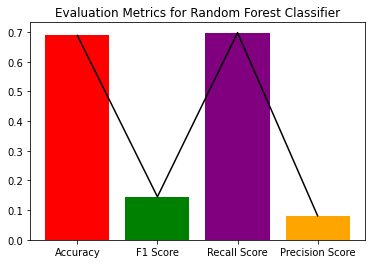


	Table 3

         deaths  pred
899007        0     0
1057250       0     1
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
******************************** confusion matrix *****************************




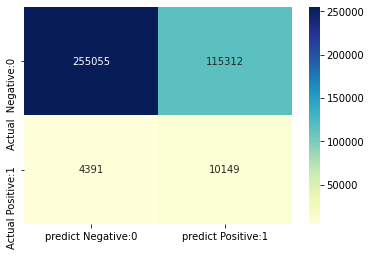

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 255055 (TNR = 68.87%),FP = 115312 (FPR = 31.13%)
True 1(deaths),FN = 4391 (FNR = 30.20%),TP = 10149 (TPR = 69.80%)


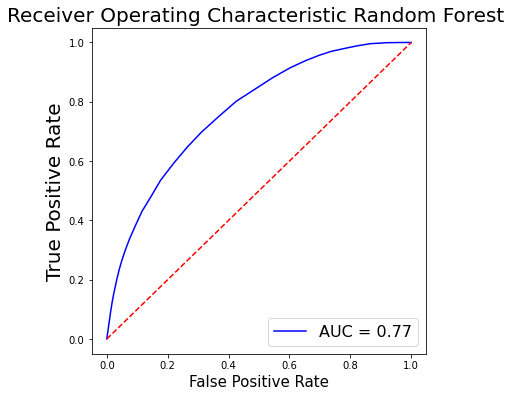

In [72]:
pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(knn.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Bewerung der Ergebnisse mit RandomUnderSampling:
    1) Minderheitsklasse (Anzahl der Todesfälle) wird mit 69.80 % richtig (True Positve) vorhergesagt
    2) False Negative Rate ist 30.20 % 
    

In [87]:
rus =RandomUnderSampler()
knn= KNeighborsClassifier(n_neighbors=1)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [88]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1158107136 
 memory after (Byte): 1155620864 
 used_memory (Byte): -2486272 
 time (Sekunde): 0.4118955135345459


In [89]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1155629056 
 memory after (Byte): 1163141120 
 used_memory (Byte): 7512064 
 time (Sekunde): 0.3231697082519531


Accuracy of test_data:  0.7630362659031922
Accuracy of train_data:  0.9357842331446822
Recall: 0.774
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 77.0)
              precision    recall  f1-score   support

           0       0.99      0.76      0.86    370367
           1       0.11      0.77      0.20     14540

    accuracy                           0.76    384907
   macro avg       0.55      0.77      0.53    384907
weighted avg       0.96      0.76      0.84    384907

Recall Score:  0.7742778541953232
Precision Score:  0.11350506629026566
F1 Score:  0.19798637063090788
Accuracy:  0.7630362659031922


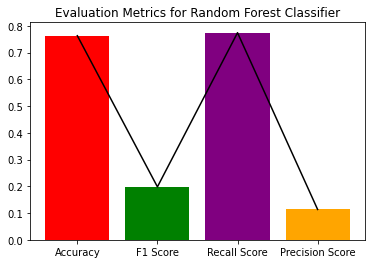


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
******************************** confusion matrix *****************************




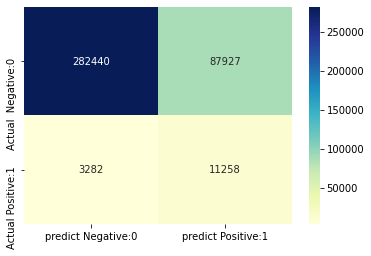

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 282440 (TNR = 76.26%),FP = 87927 (FPR = 23.74%)
True 1(deaths),FN = 3282 (FNR = 22.57%),TP = 11258 (TPR = 77.43%)


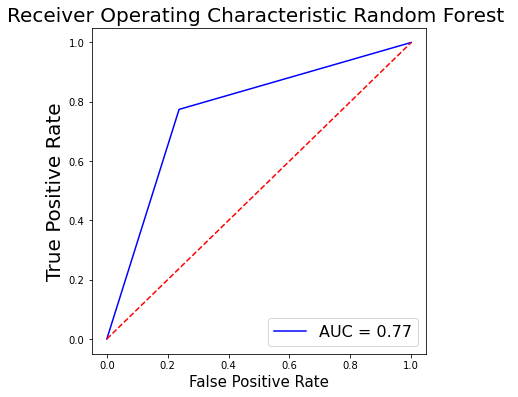

In [90]:
pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(knn.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# NearMiss

In [74]:
near =NearMiss()
knn= KNeighborsClassifier(n_neighbors=48)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [75]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_near, y_train_near = near.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1461317632 
 memory after (Byte): 1469243392 
 used_memory (Byte): 7925760 
 time (Sekunde): 13.422051429748535


In [76]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn.fit(X_train_near, y_train_near)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1469243392 
 memory after (Byte): 1473069056 
 used_memory (Byte): 3825664 
 time (Sekunde): 0.34944963455200195


Accuracy of test_data:  0.39815072212248676
Accuracy of train_data:  0.6645022661625531
Recall: 0.562
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 48.0)
              precision    recall  f1-score   support

           0       0.96      0.39      0.56    370367
           1       0.03      0.56      0.07     14540

    accuracy                           0.40    384907
   macro avg       0.50      0.48      0.31    384907
weighted avg       0.92      0.40      0.54    384907

Recall Score:  0.5616231086657496
Precision Score:  0.03497995270895446
F1 Score:  0.06585802538832525
Accuracy:  0.39815072212248676


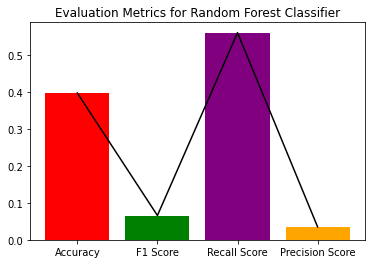


	Table 3

         deaths  pred
899007        0     1
1057250       0     1
490454        0     0
1307121       0     0
251263        0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
******************************** confusion matrix *****************************




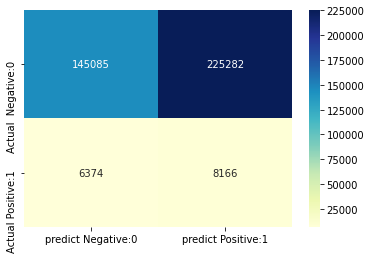

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 145085 (TNR = 39.17%),FP = 225282 (FPR = 60.83%)
True 1(deaths),FN = 6374 (FNR = 43.84%),TP = 8166 (TPR = 56.16%)


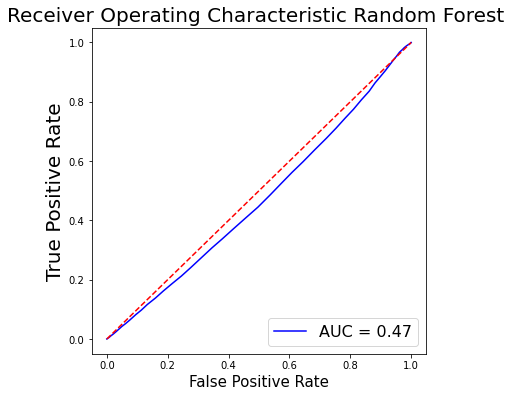

In [77]:
pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train_near))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_near, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(knn.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# RandomOverSampler

In [78]:
ros =RandomOverSampler()
knn= KNeighborsClassifier(n_neighbors=48)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [79]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
finish=time.time() - start
mem_after=get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1455230976 
 memory after (Byte): 1562001408 
 used_memory (Byte): 106770432 
 time (Sekunde): 0.9414777755737305


In [80]:
import time
import os
import psutil

def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before = get_process_memory()
start = time.time()
knn.fit(X_train_ros, y_train_ros)
finish = time.time() - start
mem_after = get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):" ,mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1562001408 
 memory after (Byte): 1692356608 
 used_memory (Byte): 130355200 
 time (Sekunde): 285.30389761924744


Accuracy of test_data:  0.783688007752522
Accuracy of train_data:  0.8764079900371807
Recall: 0.846
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 81.0)
              precision    recall  f1-score   support

           0       0.99      0.78      0.87    370367
           1       0.13      0.85      0.23     14540

    accuracy                           0.78    384907
   macro avg       0.56      0.81      0.55    384907
weighted avg       0.96      0.78      0.85    384907

Recall Score:  0.8458734525447043
Precision Score:  0.13179665230716475
F1 Score:  0.22805911476200189
Accuracy:  0.783688007752522


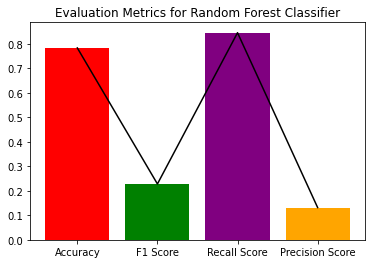


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     0
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
******************************** confusion matrix *****************************




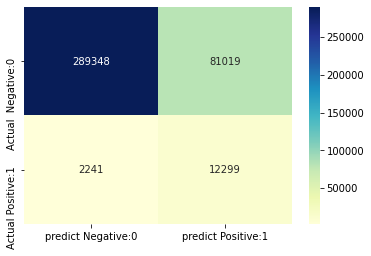

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 289348 (TNR = 78.12%),FP = 81019 (FPR = 21.88%)
True 1(deaths),FN = 2241 (FNR = 15.41%),TP = 12299 (TPR = 84.59%)


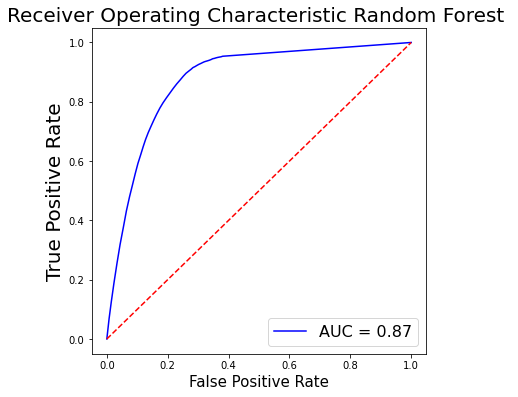

In [82]:
pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train_ros))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_ros, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))
print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(knn.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# SMOTE

In [83]:
somte =SMOTE(random_state=42)
knn= KNeighborsClassifier(n_neighbors=48)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [84]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_som, y_train_som = somte.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1153372160 
 memory after (Byte): 1263616000 
 used_memory (Byte): 110243840 
 time (Sekunde): 1.4989891052246094


In [85]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
knn.fit(X_train_som, y_train_som)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1263624192 
 memory after (Byte): 1393983488 
 used_memory (Byte): 130359296 
 time (Sekunde): 285.76354932785034


Accuracy of test_data:  0.8214763566264058
Accuracy of train_data:  0.8865654799102627
Recall: 0.780
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 80.0)
              precision    recall  f1-score   support

           0       0.99      0.82      0.90    370367
           1       0.15      0.78      0.25     14540

    accuracy                           0.82    384907
   macro avg       0.57      0.80      0.57    384907
weighted avg       0.96      0.82      0.87    384907

Recall Score:  0.7801925722145805
Precision Score:  0.14758726565447614
F1 Score:  0.24821942387011367
Accuracy:  0.8214763566264058


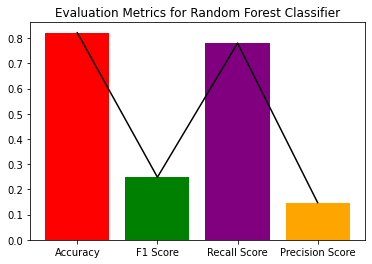


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     0
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
******************************** confusion matrix *****************************




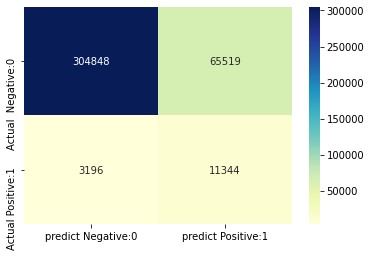

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 304848 (TNR = 82.31%),FP = 65519 (FPR = 17.69%)
True 1(deaths),FN = 3196 (FNR = 21.98%),TP = 11344 (TPR = 78.02%)


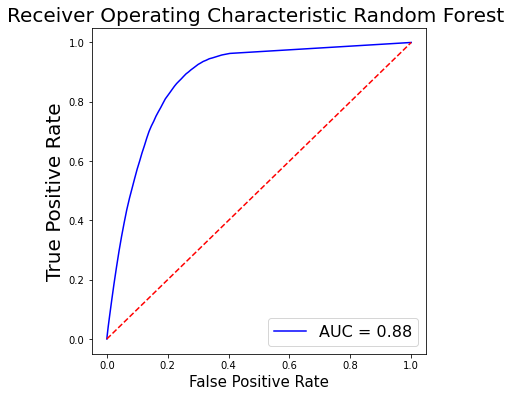

In [86]:
pred = np.array(knn.predict(X_test))
pred_train = np.array(knn.predict(X_train_som))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_som, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(knn.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = knn.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print('********************************* feature importances**************************\n\n')
# print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Die Ergbnisse sagte aus:
    1) RandomUnderResampling mit der Funktion GradSearchCv leifert das beste Trainingsmodel 
    2) NearMiss Resampling-Methode bringt die am schlemesten Ergebisse

# Bewertung der extrahrierten Muster mit Tableua

In [150]:
pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [151]:
pred.sum()

109785

In [152]:
y_test.sum()

14540

In [153]:
X_testdf= pd.DataFrame(X_test_input,columns=['age_group', 'state','county','gender','date','recovered','cases'])
y_testdf= pd.DataFrame(y_test,columns=['deaths'])
predictionsdf= pd.DataFrame(pred,columns=['predictions_deaths'])
testdata=[X_testdf,y_testdf,predictionsdf]
X_testdf.reset_index(drop=True, inplace=True)
y_testdf.reset_index(drop=True, inplace=True)
predictionsdf.reset_index(drop=True, inplace=True)
testdatadf=pd.concat(testdata,axis=1)

In [154]:
testdatadf

,age_group,state,county,gender,date,recovered,cases,deaths,predictions_deaths
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1
1,47,Nordrhein-Westfalen,SK Dortmund,M,2021-01-20,1,20,0,0
2,90,Berlin,SK Berlin Neukoelln,F,2020-12-17,1,35,0,1
3,70,Sachsen,LK Meissen,M,2020-12-07,1,24,0,1
4,47,Bayern,LK Freyung-Grafenau,F,2020-12-18,1,13,0,0
...,...,...,...,...,...,...,...,...,...
384902,70,Sachsen,LK Saechsische Schweiz-Osterzgebirge,M,2020-11-20,1,19,0,1
384903,70,Bayern,SK Nuernberg,M,2021-01-01,1,11,0,1
384904,24,Sachsen,SK Leipzig,M,2020-12-14,1,37,0,0
384905,47,Bayern,LK Muehldorf a.Inn,M,2021-02-06,1,6,0,0


In [155]:
testdatadf.head(1)

,age_group,state,county,gender,date,recovered,cases,deaths,predictions_deaths
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1


In [156]:
testdatadf.columns = ['age_group_test','state_test','county_test','gender_test','date_test','recovered_test','cases_org','deaths_test','predictions_deaths_test']

In [157]:
testdatadf

,age_group_test,state_test,county_test,gender_test,date_test,recovered_test,cases_org,deaths_test,predictions_deaths_test
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1
1,47,Nordrhein-Westfalen,SK Dortmund,M,2021-01-20,1,20,0,0
2,90,Berlin,SK Berlin Neukoelln,F,2020-12-17,1,35,0,1
3,70,Sachsen,LK Meissen,M,2020-12-07,1,24,0,1
4,47,Bayern,LK Freyung-Grafenau,F,2020-12-18,1,13,0,0
...,...,...,...,...,...,...,...,...,...
384902,70,Sachsen,LK Saechsische Schweiz-Osterzgebirge,M,2020-11-20,1,19,0,1
384903,70,Bayern,SK Nuernberg,M,2021-01-01,1,11,0,1
384904,24,Sachsen,SK Leipzig,M,2020-12-14,1,37,0,0
384905,47,Bayern,LK Muehldorf a.Inn,M,2021-02-06,1,6,0,0


In [159]:
testdatadf.to_csv('datatestdeuschland_knn.csv',index=False)

# Finish